In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../data/processed/balanced_fights.csv')

sns.set_style(style="whitegrid")

Duration of fights (in seconds):
count    17024.000000
mean       635.215930
std        363.339772
min          5.000000
25%        280.000000
50%        812.000000
75%        900.000000
max       1500.000000
Name: total_time_seconds, dtype: float64


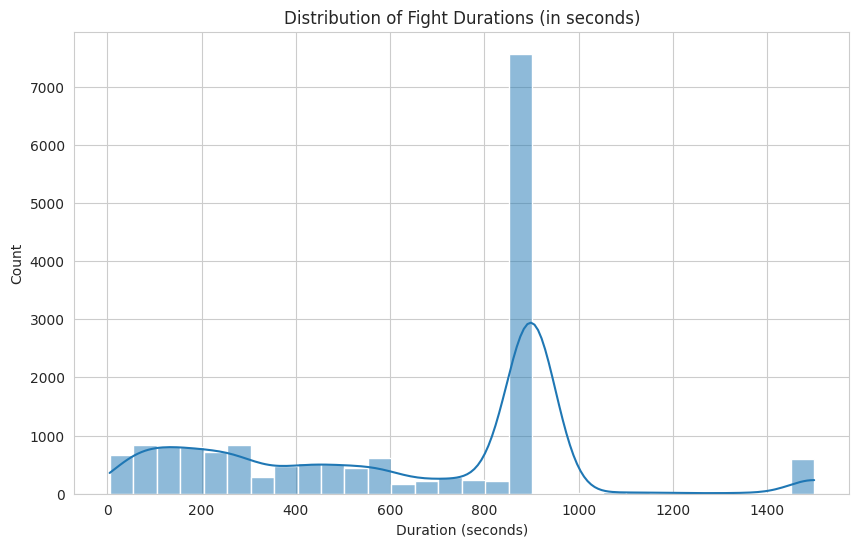

In [51]:
if 'total_time_seconds' in df.columns:
    print("Duration of fights (in seconds):")
    print(df['total_time_seconds'].describe())

    plt.figure(figsize=(10, 6))
    sns.histplot(df['total_time_seconds'], bins=30, kde=True)
    plt.title('Distribution of Fight Durations (in seconds)')
    plt.xlabel('Duration (seconds)')
    plt.show()
else:
    print("Column 'total_time_seconds' not found in the dataset.")

In [52]:
zero_strikes_fights = df[
    (df['f1_tot_str_attempted'] == 0) &
    (df['f2_tot_str_attempted'] == 0)
]

print(f"Number of fights with zero strikes attempted: {len(zero_strikes_fights)}")
if len(zero_strikes_fights) > 0:
    print("\nExample of a fight with zero strikes attempted:")
    cols_to_show = ['event_date', 'f1_name', 'f2_name', 'method_detail', 'f1_tot_str_attempted']
    display(zero_strikes_fights[cols_to_show].head())

Number of fights with zero strikes attempted: 6

Example of a fight with zero strikes attempted:


,event_date,f1_name,f2_name,method_detail,f1_tot_str_attempted
2324,1994-03-11,Royce Gracie,Jason DeLucia,Armbar From Mount,0
2514,1994-03-11,Royce Gracie,Remco Pardoel,Gi Choke From Back Control,0
6684,1995-07-14,Oleg Taktarov,Anthony Macias,Guillotine Choke After Drop to Ground,0
8695,1994-03-11,Royce Gracie,Jason DeLucia,Armbar From Mount,0
8897,1995-07-14,Oleg Taktarov,Anthony Macias,Guillotine Choke After Drop to Ground,0


Methods distribution (Top 10 %):
method_detail
Punch to Head At Distance            8.722446
Rear Naked Choke                     7.383266
Punches to Head At Distance          4.349372
Punches to Head On Ground            3.010192
Punch to Head In Clinch              1.528798
Kick to Head At Distance             1.362882
Punches to Head From Mount           1.351031
Punches to Head From Back Control    1.196966
Guillotine Choke On Ground           0.805878
Triangle Choke From Bottom Guard     0.782176
Name: proportion, dtype: float64


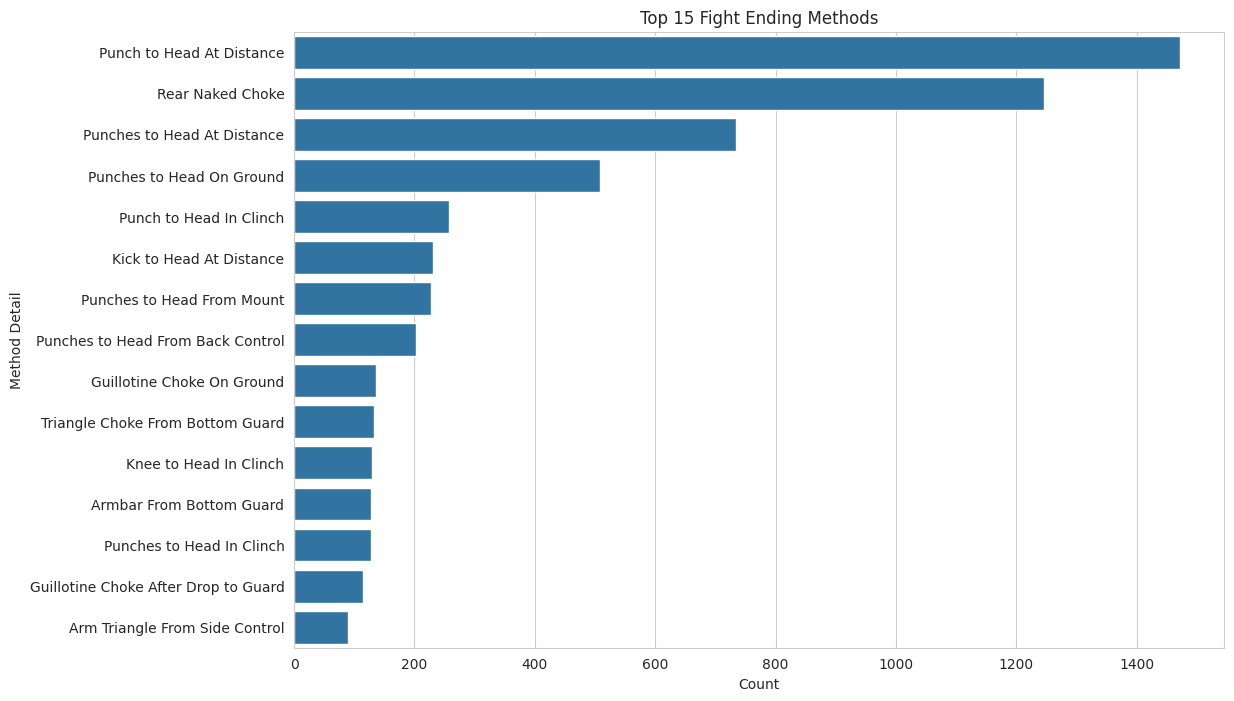

In [53]:
if 'method_detail' in df.columns:
    method_counts = df['method_detail'].value_counts(normalize=True) * 100
    print("Methods distribution (Top 10 %):")
    print(method_counts.head(10))

    plt.figure(figsize=(12, 8))
    
    top_methods = df['method_detail'].value_counts().iloc[:15].index
    
    sns.countplot(y='method_detail', data=df, order=top_methods)
    plt.title('Top 15 Fight Ending Methods')
    plt.xlabel('Count')
    plt.ylabel('Method Detail')
    plt.show()
else:
    print("Column 'method_detail' not found.")

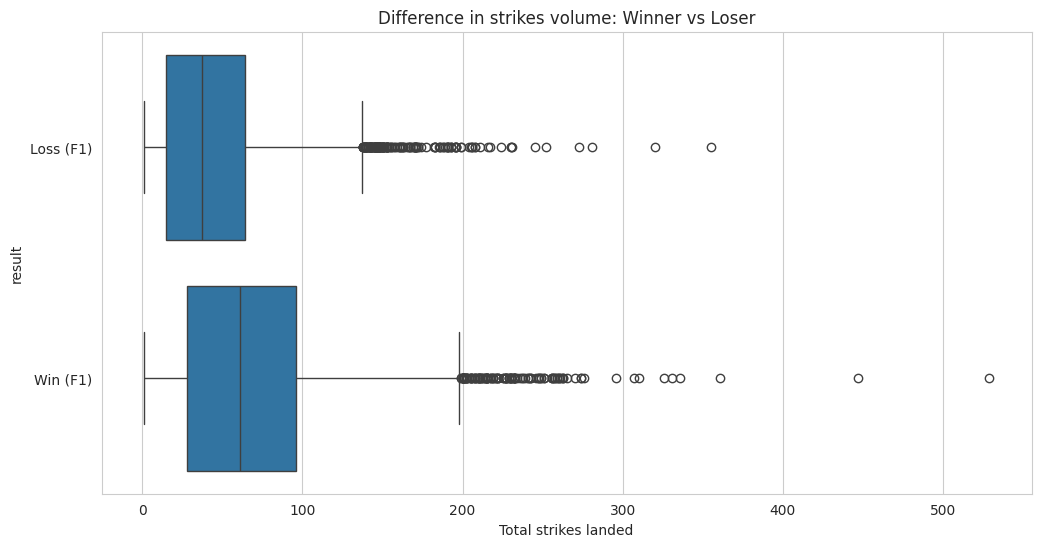

In [54]:
df_filtered = df[df['f1_tot_str_landed'] > 0].copy()

df_filtered['result'] = df_filtered['target'].map({1: 'Win (F1)', 0: 'Loss (F1)'})

plt.figure(figsize=(12, 6))

sns.boxplot(x='f1_tot_str_landed', y='result', data=df_filtered, orient='h')

plt.title('Difference in strikes volume: Winner vs Loser')
plt.xlabel('Total strikes landed')
plt.show()

In [55]:
discovery_columns = ['f1_name', 'f2_name', 'target', 'method_detail']
display(df[discovery_columns].sample(10))

,f1_name,f2_name,target,method_detail
9379,Ovince Saint Preux,Jamahal Hill,1,Punches to Head At Distance
6532,Alexander Volkanovski,Jeremy Kennedy,0,Punches to Head From Half Guard
4560,Iuri Alcantara,Jimmie Rivera,1,Michelle Agustin 28 - 29. Ricardo Almeida 28 -...
6829,Michael Chiesa,Kevin Holland,1,D'Arce Choke On Ground
5623,Tyson Griffin,Evan Dunham,0,Chris Franco 27 - 30. Tony Weeks 29 - 28. Lanc...
6024,Renan Barao,TJ Dillashaw,0,Punches to Head At Distance
9625,Luke Zachrich,Guilherme Vasconcelos,0,Doug Crosby 27 - 30. Marcos Rosales 27 - 30. C...
9417,Brandon Royval,Rogerio Bontorin,0,Eric Colon 28 - 29. Doug Crosby 29 - 28. Chris...
15251,Andre Fili,Charles Jourdain,0,Eric Colon 28 - 29. Derek Cleary 28 - 29. Ron ...
15883,Jessica-Rose Clark,Joselyne Edwards,1,Sal D'amato 27 - 30. Ron McCarthy 27 - 30. Eri...


In [56]:
df['diff_age'] = df['f1_age'] - df['f2_age']
df['diff_height'] = df['f1_height'] - df['f2_height']
df['diff_reach'] = df['f1_reach'] - df['f2_reach']

display(df.sample(10))

,f2_tot_str_attempted,f1_td_landed,f1_reach,f1_ctrl,weight_class,f2_link,f1_weight,f2_td_attempted,f1_rev,f1_sig_pct,...,f1_height,f1_age,f1_tot_str_landed,event_date,f1_stance,f2_rev,f2_stance,diff_age,diff_height,diff_reach
15155,27,1,177.80,77,Lightweight,http://ufcstats.com/fighter-details/9b198c73e3...,65.77084,0,0,0.63,...,170.18,29.002053,20,2013-11-09,Orthodox,0,Southpaw,-2.658453,-2.54,0.00
15681,88,0,190.50,0,Lightweight,http://ufcstats.com/fighter-details/9b7694d064...,70.30676,8,0,0.35,...,180.34,34.401095,57,2018-09-15,Orthodox,0,Orthodox,2.537988,7.62,5.08
6673,102,5,170.18,602,Women's Strawweight,http://ufcstats.com/fighter-details/4e30e4250c...,52.16308,1,0,0.41,...,162.56,29.853525,110,2025-09-27,Orthodox,0,Orthodox,0.161533,7.62,15.24
8472,119,3,177.80,402,Featherweight,http://ufcstats.com/fighter-details/b8c0f30ee9...,70.30676,7,1,0.42,...,175.26,37.166324,42,2016-07-08,Orthodox,0,Orthodox,2.798084,7.62,NaN
494,27,0,185.42,0,Welterweight,http://ufcstats.com/fighter-details/f4c49976c7...,70.30676,0,0,0.00,...,185.42,36.807666,0,2020-01-18,Orthodox,0,Southpaw,5.295003,10.16,-2.54
15693,2,0,177.80,3,Lightweight,http://ufcstats.com/fighter-details/92a9aa9c93...,77.11064,2,0,0.20,...,177.80,31.627652,1,2010-03-21,Orthodox,0,Orthodox,5.782341,0.00,-2.54
15010,214,0,172.72,0,Flyweight,http://ufcstats.com/fighter-details/67c1d46f4e...,56.69900,0,0,0.30,...,170.18,37.292266,58,2021-01-20,Orthodox,0,Orthodox,6.277892,-2.54,-5.08
12496,35,0,170.18,0,Bantamweight,http://ufcstats.com/fighter-details/efb96bf3e9...,61.23492,0,0,0.36,...,167.64,33.875428,9,2022-03-12,Orthodox,0,Orthodox,9.601643,-5.08,0.00
16797,164,8,182.88,273,Welterweight,http://ufcstats.com/fighter-details/ab850a77a0...,77.11064,0,0,0.45,...,175.26,26.669405,66,2014-03-15,Orthodox,1,Orthodox,-0.052019,-2.54,-5.08
6700,47,0,NaN,82,Heavyweight,http://ufcstats.com/fighter-details/f0abbb6f34...,111.13004,0,0,0.54,...,190.50,34.425736,26,2005-06-04,Orthodox,0,Orthodox,3.044490,2.54,NaN


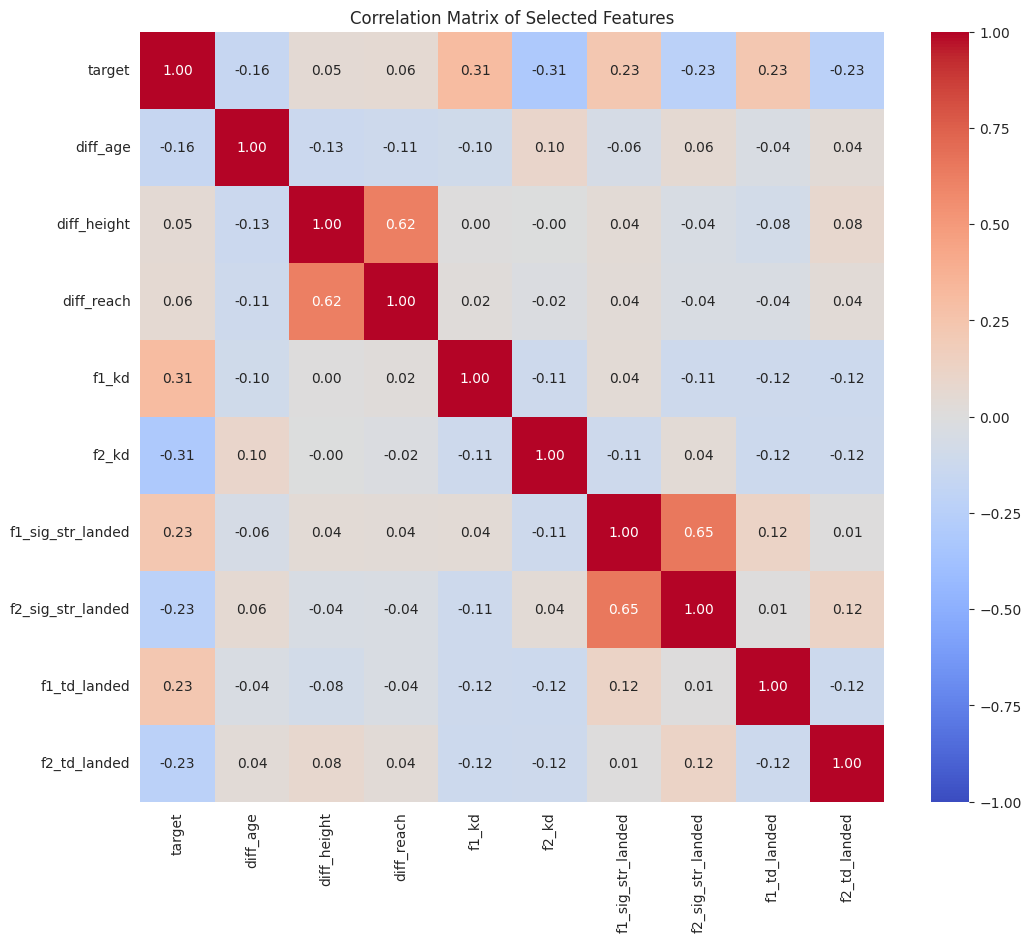

In [57]:
selected_columns = [
    'target',
    'diff_age', 'diff_height', 'diff_reach',
    'f1_kd', 'f2_kd',
    'f1_sig_str_landed', 'f2_sig_str_landed',
    'f1_td_landed', 'f2_td_landed',
]

corr_matrix = df[selected_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix of Selected Features')
plt.show()

1. Knockdown Power (`f1_kd`):
    - There is a strong positive correlation between scoring a knockdown (`f1_kd`) and winning the fight.
    - This confirms that knockdowns are decisive events, often leading to a knockout or securing the round on points.
    - The inverse is also true: suffering a knockdown (`f2_kd`) strongly correlates with losing.

2. Strike Volume (`f1_sig_str_landed`):
    - Significant strikes landed show a positive correlation with victory.
    - Fighters who land more significant strikes tend to control the fight and score more points with judges.

3. Ground Control (`f1_td_landed`):
    - Successful takedowns show a positive correlation, indicating that taking the fight to the ground is a valid path to victory.

4. Physical Attributes (`diff_...`):
    - Differences in reach, height, and age show a weak correlation with the result.
    - This suggests that technical performance inside the cage (striking, grappling) is far more relevant than raw physical stats.

**Conclusion:**
The model should prioritize fight performance metrics (`kd`, `sig_str`, `td`) as the primary features, using physical attributes (`age`, `height`, `reach`) as secondary adjustment factors.

In [58]:
text_columns = df.select_dtypes(include=['object', 'str']).columns

print("Text columns in the dataset:", text_columns.tolist())

columns_to_encoding = ['weight_class', 'f1_stance', 'f2_stance']
df = pd.get_dummies(df, columns=columns_to_encoding, drop_first=True)

print("\nColumns after encoding:")
print([c for c in df.columns if 'weight_class' in c])

print(f"Total columns after encoding: {len(df.columns)}")

Text columns in the dataset: ['weight_class', 'f2_link', 'referee', 'method_detail', 'f1_name', 'f1_link', 'f2_name', 'event_date', 'f1_stance', 'f2_stance']

Columns after encoding:
['weight_class_Catch Weight', 'weight_class_Featherweight', 'weight_class_Flyweight', 'weight_class_Heavyweight', 'weight_class_Light Heavyweight', 'weight_class_Lightweight', 'weight_class_Middleweight', 'weight_class_Open Weight', 'weight_class_Super Heavyweight', 'weight_class_Welterweight', "weight_class_Women's Bantamweight", "weight_class_Women's Featherweight", "weight_class_Women's Flyweight", "weight_class_Women's Strawweight"]
Total columns after encoding: 66


In [59]:
new_df = df.drop(columns=['f1_name', 'f2_name', 'referee', 'event_date', 'f1_link', 'f2_link', 'f1_tot_str_landed', 'f2_tot_str_landed', 'method_detail'])

In [60]:
from sklearn.model_selection import train_test_split

x = new_df.drop(columns=['target'])
y = new_df['target']

x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=42,
)

print(f"Original size: { len(new_df)} fights")
print(f"\nTraining: {x_train.shape[0]} fights (for model study)")
print(f"Testing: {x_test.shape[0]} fights (for final evaluation)")
print(f"\nTest proportion: {x_test.shape[0] / len(new_df):.0%}")

Original size: 17024 fights

Training: 13619 fights (for model study)
Testing: 3405 fights (for final evaluation)

Test proportion: 20%


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression(max_iter=1000, random_state=42)

imputer = SimpleImputer(strategy='mean')
x_train_clean = imputer.fit_transform(x_train)
x_test_clean = imputer.transform(x_test)

model.fit(x_train_clean, y_train)

y_pred = model.predict(x_test_clean)
accuracy = accuracy_score(y_test, y_pred)

print(f"\nModel accuracy on test set: {accuracy:.2%}")
print("\nClassification report:")
print(classification_report(y_test, y_pred))


Model accuracy on test set: 88.43%

Classification report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      1702
           1       0.88      0.89      0.89      1703

    accuracy                           0.88      3405
   macro avg       0.88      0.88      0.88      3405
weighted avg       0.88      0.88      0.88      3405



/home/d0c/Documents/Projects/ufc-ml-predictor/.venv/lib/python3.14/site-packages/sklearn/linear_model/_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 2000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=2000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
